# With almost 30k commits and a history spanning over ten years, Scala is a mature programming language. It is a general-purpose programming language that has recently become another prominent language for data scientists.

# Scala is also an open source project. Open source projects have the advantage that their entire development histories, who made changes, what was changed, code reviews, etc. are publicly available.

# We're going to read in, clean up, and visualize the real world project repository of Scala that spans data from a version control system (Git) as well as a project hosting site (GitHub). We will find out who has had the most influence on its development and who are the experts.

# The dataset we will use, which has been previously mined and extracted from GitHub, is comprised of three files:

## 1. pulls_2011-2013.csv contains the basic information about the pull requests, and spans from the end of 2011 up to (but not including) 2014.
## 2. pulls_2014-2018.csv contains identical information, and spans from 2014 up to 2018.
## 3. pull_files.csv contains the files that were modified by each pull request.

## SCALA'S REAL-WORLD PROJECT REPOSITORY DATA

In [1]:
# Importing pandas
import pandas as pd

# Loading in the data
pulls_one = pd.read_csv('E:\Desktop\DataCamp\PROJ_09_THE GITHUB HISTORY OF THE SCALA LANGUAGE\datasets\pulls_2011-2013.csv')
pulls_two = pd.read_csv('E:\Desktop\DataCamp\PROJ_09_THE GITHUB HISTORY OF THE SCALA LANGUAGE\datasets/pulls_2014-2018.csv')
pull_files = pd.read_csv('E:\Desktop\DataCamp\PROJ_09_THE GITHUB HISTORY OF THE SCALA LANGUAGE\datasets\pull_files.csv') 

## PREPARING AND CLEANING THE DATA

In [2]:
# Appending pulls_one to pulls_two
pulls = pulls_one.append([pulls_two], ignore_index=True)
# Converting the date for the pulls object
pulls['date'] = pd.to_datetime(pulls['date'], utc = True)

## MERGING THE DATAFRAMES

In [3]:
# Merging the two DataFrames
data = pulls.merge(pull_files, on = 'pid')

## IS THE PROJECT STILL ACTIVELY MAINTAINED?

<AxesSubplot:xlabel='month,year'>

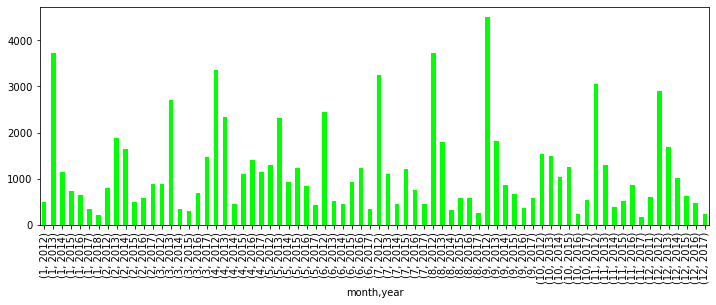

In [11]:
%matplotlib inline

# Creating a column that will store the month
data['month'] = data['date'].dt.month

# Creating a column that will store the year
data['year'] = data['date'].dt.year

# Grouping by the month and year and count the pull requests
counts = data.groupby(['month', 'year'])['pid'].count()

# Plotting the results
counts.plot(kind='bar', figsize = (12,4), color = 'lime')

## IS THERE CAMARADERIE IN THE PROJECT?

array([[<AxesSubplot:title={'center':'pid'}>]], dtype=object)

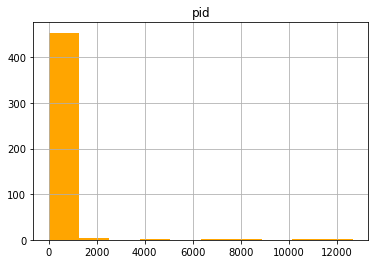

In [13]:
# Required for matplotlib
%matplotlib inline

# Grouping by the submitter
by_user = data.groupby('user').agg({'pid':'count'})

# Plotting the histogram
by_user.hist(color = 'orange')

## WHAT FILES WERE CHANGED IN THE LAST TEN PULL REQUESTS?

In [14]:
# Identifying the last 10 pull requests
last_10 = data.nlargest(10, 'pid', keep = 'last')

# Joining the two data sets
joined_pr = last_10.merge(pull_files, on = 'pid')

# Identifying the unique files
files = set(joined_pr['file_x'].unique())

# Printing the results
files

{'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/library/scala/concurrent/Lock.scala',
 'test/files/pos/t5638/Among.java',
 'test/files/pos/t5638/Usage.scala',
 'test/files/pos/t9291.scala',
 'test/files/run/t8348.check',
 'test/files/run/t8348/TableColumn.java',
 'test/files/run/t8348/TableColumnImpl.java',
 'test/files/run/t8348/Test.scala'}

## WHO MADE THE MOST PULL REQUESTS TO A GIVEN FILE?

In [15]:
# This is the file we are interested in:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Identifying the commits that changed the file
file_pr = data[data['file'] == file]

# Counting the number of changes made by each developer
author_counts = file_pr.groupby('user').count()

# Printing the top 3 developers
author_counts.nlargest(3, 'file')

,pid,date,file,month,year
user,,,,,
xeno-by,11,11,11,11,11
retronym,5,5,5,5,5
soc,4,4,4,4,4


## WHO MADE THE LAST TEN PULL REQUESTS ON A GIVEN FILE?

In [16]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Selecting the pull requests that changed the target file
file_pr = pull_files[pull_files['file'] == file]

# Merging the obtained results with the pulls DataFrame
joined_pr = file_pr.merge(pulls, on = 'pid')

# Finding the users of the last 10 most recent pull requests
users_last_10 = set(joined_pr.nlargest(10, 'date')['user'])

# Printing the results
users_last_10

{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

## THE PULL REQUESTS OF TWO SPECIAL DEVELOPERS

<AxesSubplot:xlabel='date'>

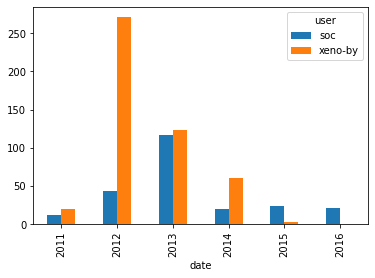

In [17]:
%matplotlib inline

# The developers we are interested in
authors = ['xeno-by', 'soc']

# Getting all the developers' pull requests
by_author = pulls[pulls['user'].isin(authors)]

# Counting the number of pull requests submitted each year
counts = by_author.groupby([by_author['user'], by_author['date'].dt.year]).agg({'pid': 'count'}).reset_index()

# Converting the table to a wide format
counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)

# Plotting the results
counts_wide.plot(kind='bar')

## VISUALIZING THE CONTRIBUTIONS OF EACH DEVELOPER

<AxesSubplot:xlabel='date'>

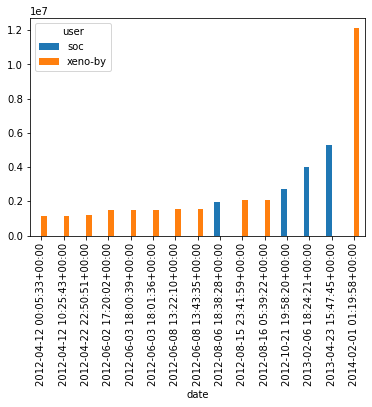

In [18]:
authors = ['xeno-by', 'soc']
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Selecting the pull requests submitted by the authors, from the `data` DataFrame
by_author = data[data['user'].isin(authors)]

# Selecting the pull requests that affect the file
by_file = by_author[by_author['file'] == file]

# Grouping and counting the number of PRs done by each user each year
grouped = by_file.groupby(['user', by_file['date'].dt.year]).count()['pid'].reset_index()

# Transforming the data into a wide format
by_file_wide = by_file.pivot_table(index='date', columns='user', values='pid', fill_value=0)

# Ploting the results
by_file_wide.plot(kind='bar')